<a href="https://colab.research.google.com/github/snapmatty/FaceRecogProj/blob/main/FINAL_WOKRING_MODEL_of_project_program_face_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCRAPING THE IMAGES OF ACTORS AND ACTRESSES FROM THE BING IMAGE SEARCH ENGINE

In [2]:
pip install bing-image-downloader

In [3]:
from bing_image_downloader import downloader
import os
## Image aug + model libs
from keras.optimizer_v1 import adam
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.losses import mean_squared_error
from keras.metrics import accuracy
import cv2
from cv2 import cv2
## Graphical libs
import matplotlib.pyplot as plt
##Mathematical libs
import numpy as np
import random
from skimage.util import random_noise



In [4]:
from google.colab.patches import cv2_imshow 
from scipy.ndimage.interpolation import rotate


In [5]:
from PIL import Image 


In [7]:
Names = ["Johnny Depp face", "John Travolta face", "Leonardo Di Caprio face", "Brad Pitt face", "Keanu Reeves face",
         "Kristen Stewart face", "Angelina Jolie face", "Natalie Portman face","Nicole Kidman face", "Penelope Cruz face"]


In [8]:
for element in Names:
  downloader.download(element, limit=20, output_dir="dataset/")



[%] Downloading Images to /content/dataset/Johnny Depp face


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/a9/7c/59/a97c5982da6446ab699d469e3ec713cf.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://images6.fanpop.com/image/photos/32600000/Johnny-Depp-johnny-depp-32658688-2267-3396.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://akns-images.eonline.com/eol_images/Entire_Site/2013513/rs_1024x759-130613133718-1024.JohnnyDepp.mh.061313.jpg?fit=around|1024:759&amp;output-quality=90&amp;crop=1024:759;center,top
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cheatsheet.com/wp-content/uploads/2020/03/Johnny-Depp-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://1.bp.blogspot.com/-qNJ33s3Nb68/W5CUa3jTcqI/AAAAAAADSJc/IpLE8keJXSQEtLkhSGYag7nSLvSK7OqDACLcBGAs/s1600/young-johnny-depp-5.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://elle.in/wp-

Streaming output truncated to the last 5000 lines.
[[[149 154 152]
  [151 156 154]
  [153 158 156]
  ...
  [ 98 106 106]
  [100 108 108]
  [101 109 109]]

 [[150 155 153]
  [152 157 155]
  [154 159 157]
  ...
  [ 98 106 106]
  [100 108 108]
  [102 110 110]]

 [[151 156 154]
  [153 158 156]
  [156 161 159]
  ...
  [ 99 106 109]
  [101 108 111]
  [102 109 112]]

 ...

 [[143 148 151]
  [144 149 152]
  [146 151 154]
  ...
  [120 126 137]
  [120 126 137]
  [119 125 136]]

 [[140 145 148]
  [141 146 149]
  [143 148 151]
  ...
  [119 125 136]
  [119 125 136]
  [119 125 136]]

 [[138 142 147]
  [139 143 148]
  [141 145 150]
  ...
  [119 126 135]
  [119 126 135]
  [119 126 135]]]
/content/dataset/John Travolta face/Image_17.jpg
[[[ 4 49 70]
  [ 4 49 70]
  [ 4 49 70]
  ...
  [27 60 76]
  [26 59 75]
  [26 59 75]]

 [[ 4 49 70]
  [ 4 49 70]
  [ 4 49 70]
  ...
  [27 60 76]
  [26 59 75]
  [26 59 75]]

 [[ 5 50 71]
  [ 5 50 71]
  [ 5 50 71]
  ...
  [27 60 76]
  [26 59 75]
  [26 59 75]]

 ...

 [[ 8 

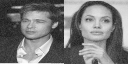

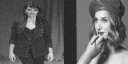

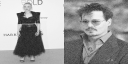

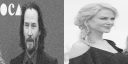

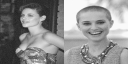

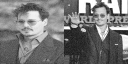

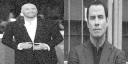

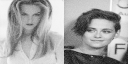

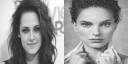

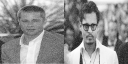

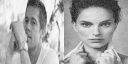

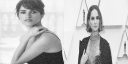

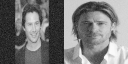

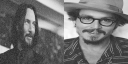

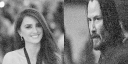

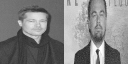

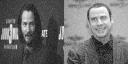

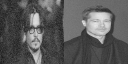

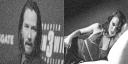

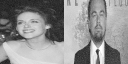

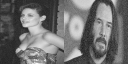

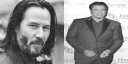

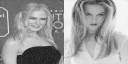

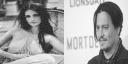

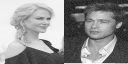

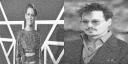

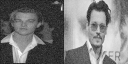

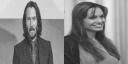

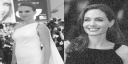

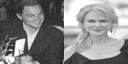

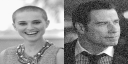

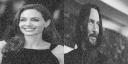

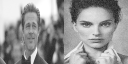

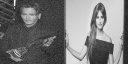

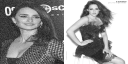

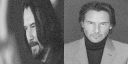

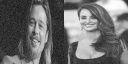

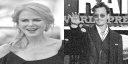

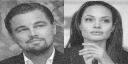

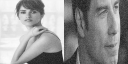

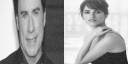

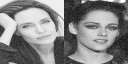

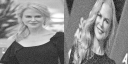

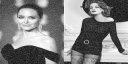

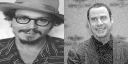

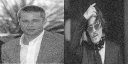

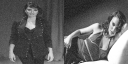

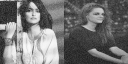

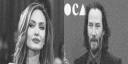

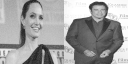

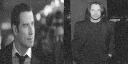

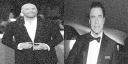

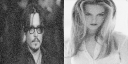

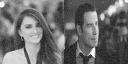

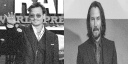

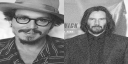

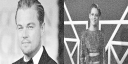

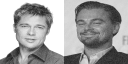

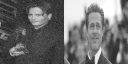

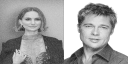

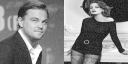

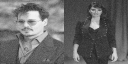

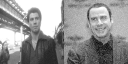

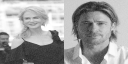

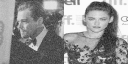

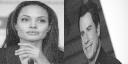

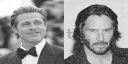

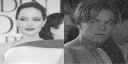

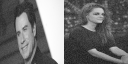

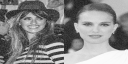

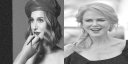

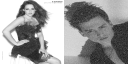

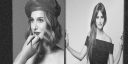

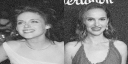

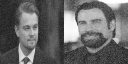

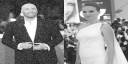

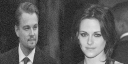

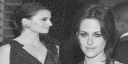

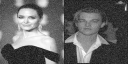

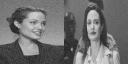

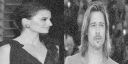

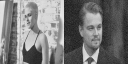

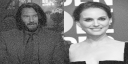

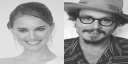

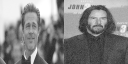

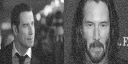

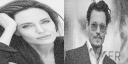

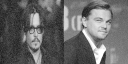

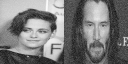

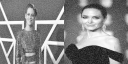

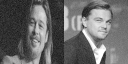

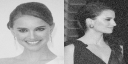

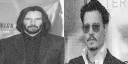

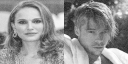

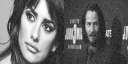

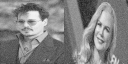

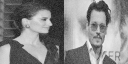

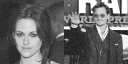

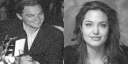

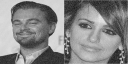

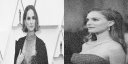

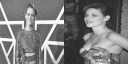

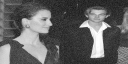

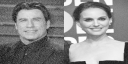

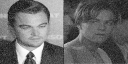

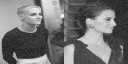

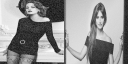

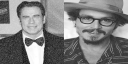

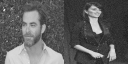

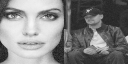

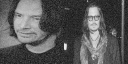

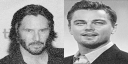

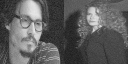

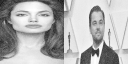

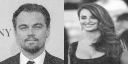

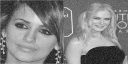

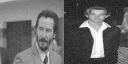

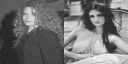

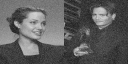

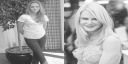

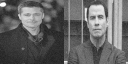

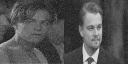

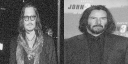

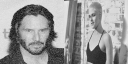

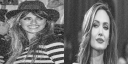

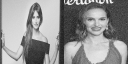

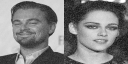

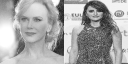

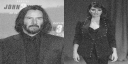

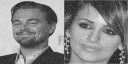

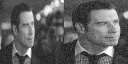

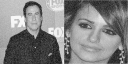

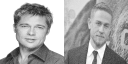

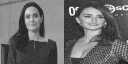

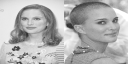

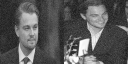

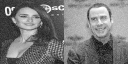

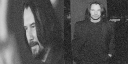

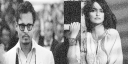

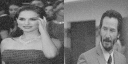

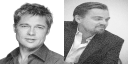

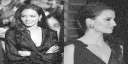

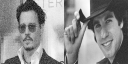

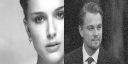

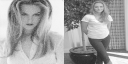

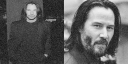

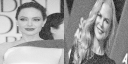

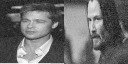

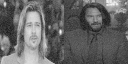

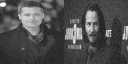

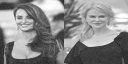

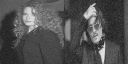

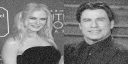

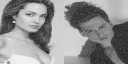

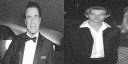

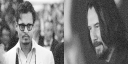

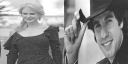

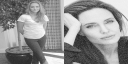

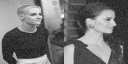

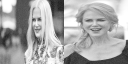

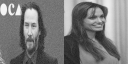

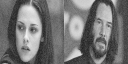

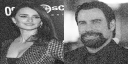

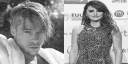

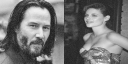

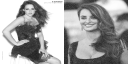

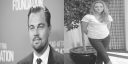

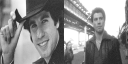

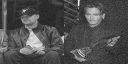

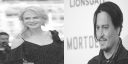

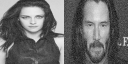

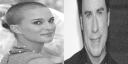

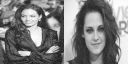

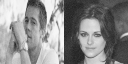

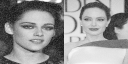

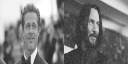

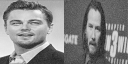

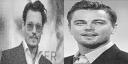

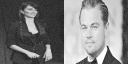

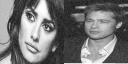

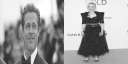

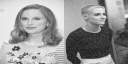

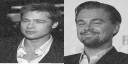

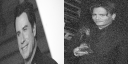

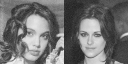

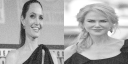

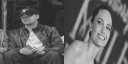

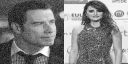

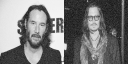

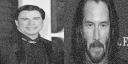

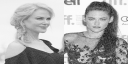

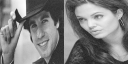

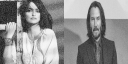

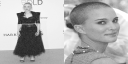

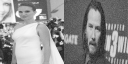

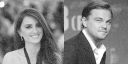

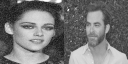

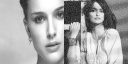

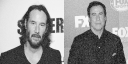

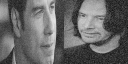

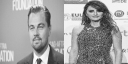

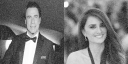

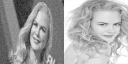

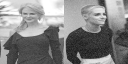

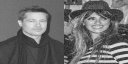

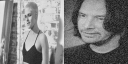

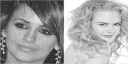

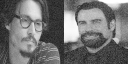

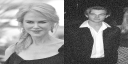

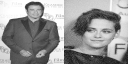

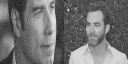

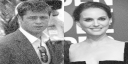

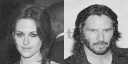

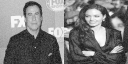

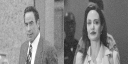

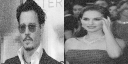

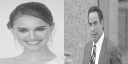

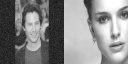

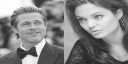

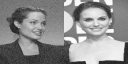

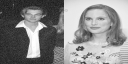

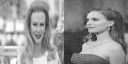

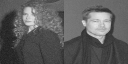

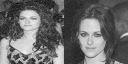

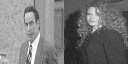

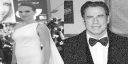

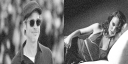

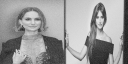

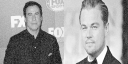

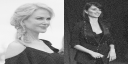

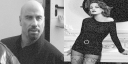

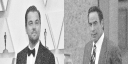

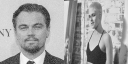

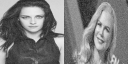

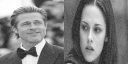

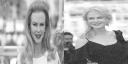

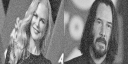

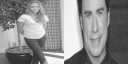

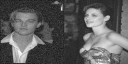

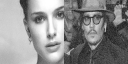

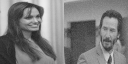

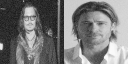

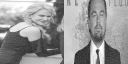

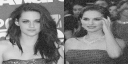

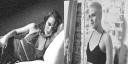

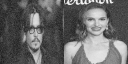

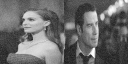

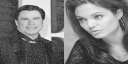

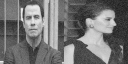

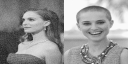

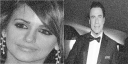

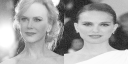

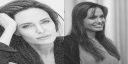

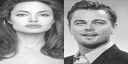

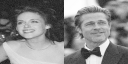

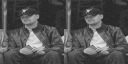

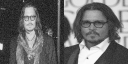

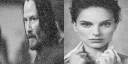

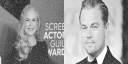

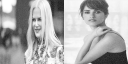

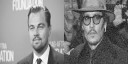

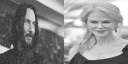

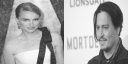

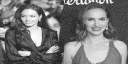

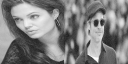

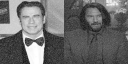

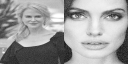

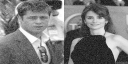

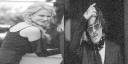

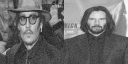

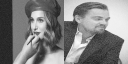

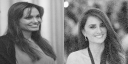

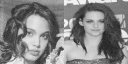

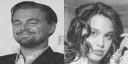

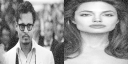

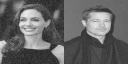

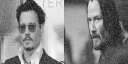

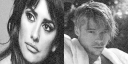

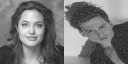

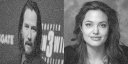

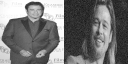

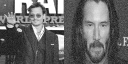

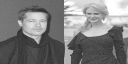

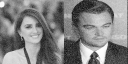

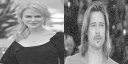

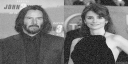

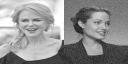

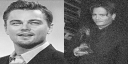

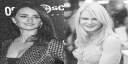

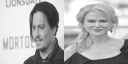

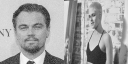

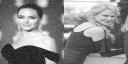

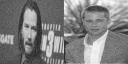

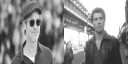

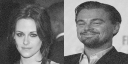

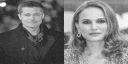

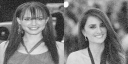

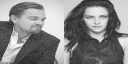

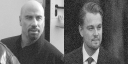

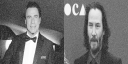

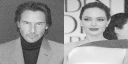

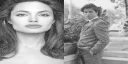

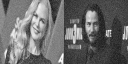

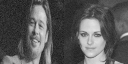

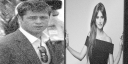

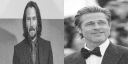

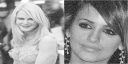

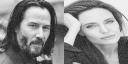

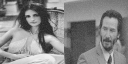

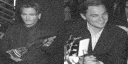

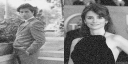

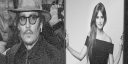

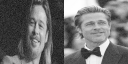

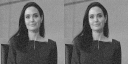

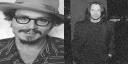

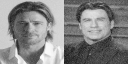

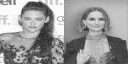

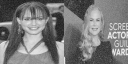

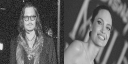

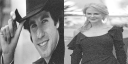

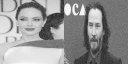

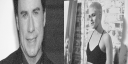

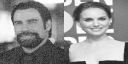

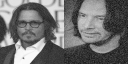

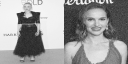

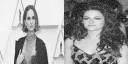

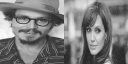

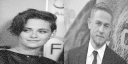

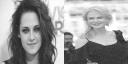

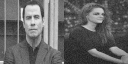

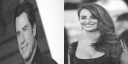

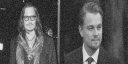

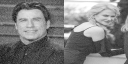

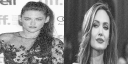

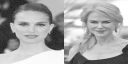

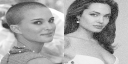

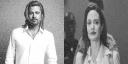

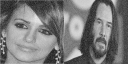

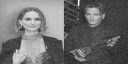

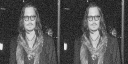

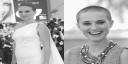

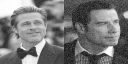

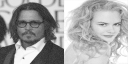

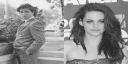

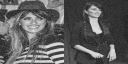

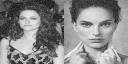

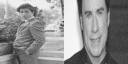

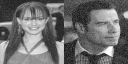

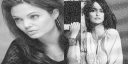

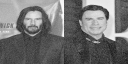

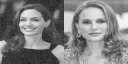

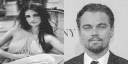

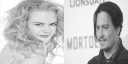

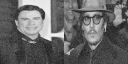

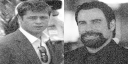

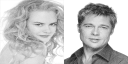

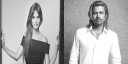

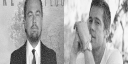

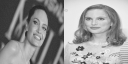

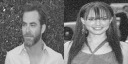

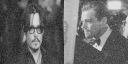

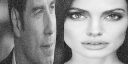

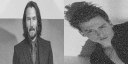

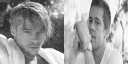

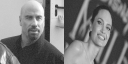

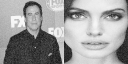

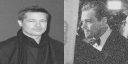

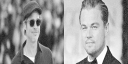

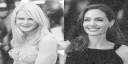

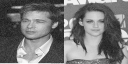

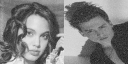

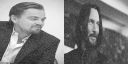

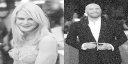

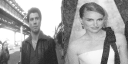

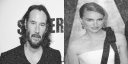

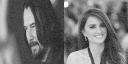

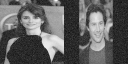

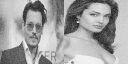

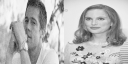

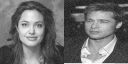

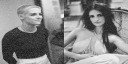

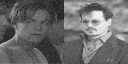

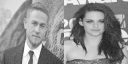

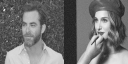

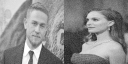

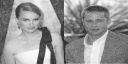

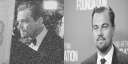

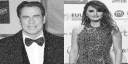

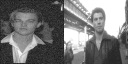

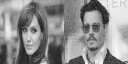

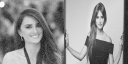

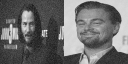

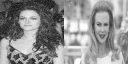

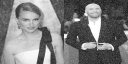

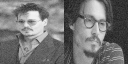

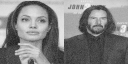

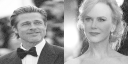

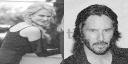

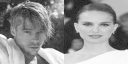

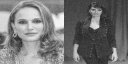

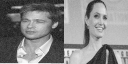

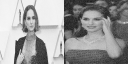

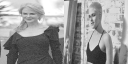

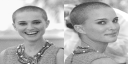

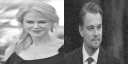

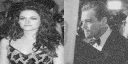

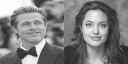

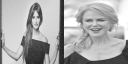

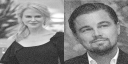

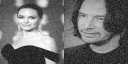

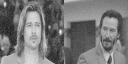

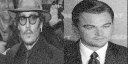

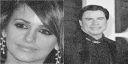

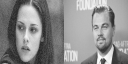

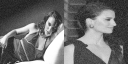

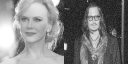

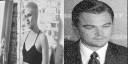

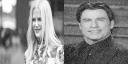

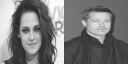

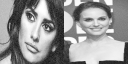

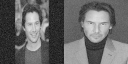

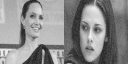

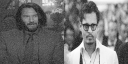

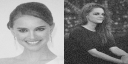

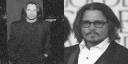

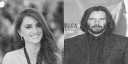

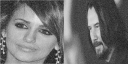

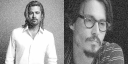

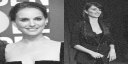

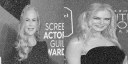

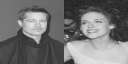

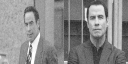

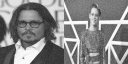

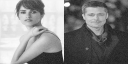

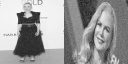

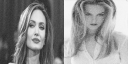

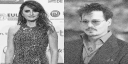

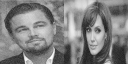

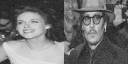

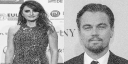

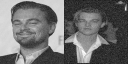

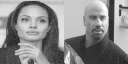

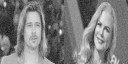

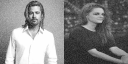

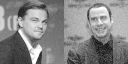

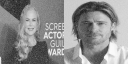

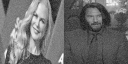

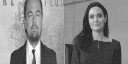

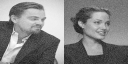

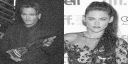

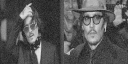

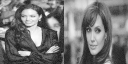

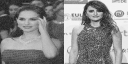

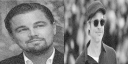

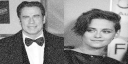

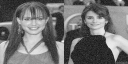

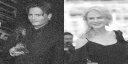

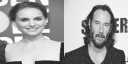

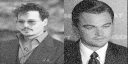

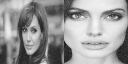

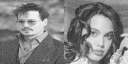

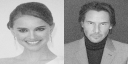

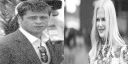

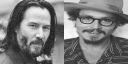

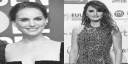

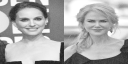

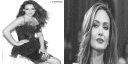

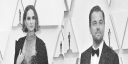

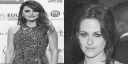

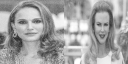

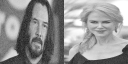

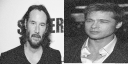

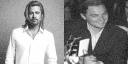

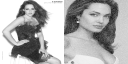

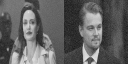

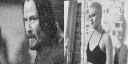

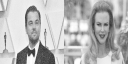

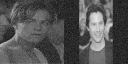

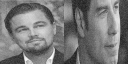

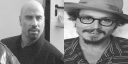

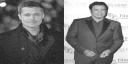

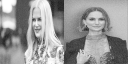

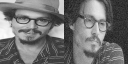

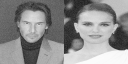

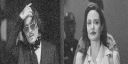

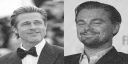

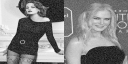

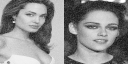

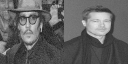

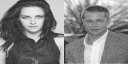

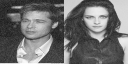

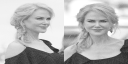

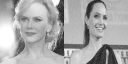

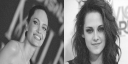

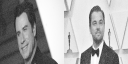

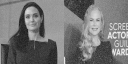

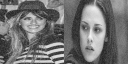

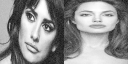

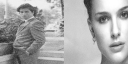

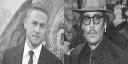

Returning list of CombinedImages...
Number of items in list of CombinedImages:  498
Splitting the pairs into train, val and test:
- Train batch: 348
- Test batch: 100
<class 'list'>


In [9]:
def getListOfFiles(dirName):
    # creating a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterating over all the entries
    for entry in listOfFile:
        # Creating full path
        fullPath = os.path.join(dirName, entry)  # path for each entry in the list
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles


# Create pairs of augmented images (if pair is from the same directory they are set as TRUE (1) if not FALSE (0) 1/0 approach
def generateAugumentedImagePairs(source_dir):
    print('Creating pairs from:', source_dir)

    listOfFiles = getListOfFiles(source_dir)
    print("Elements of list:", len(listOfFiles))
    listOfImages = []
    for filename in listOfFiles:
        image = normalizeImage(augumentImage(greyImage(readImageFromFile(filename))))
        for x in range(0, 5):
            listOfImages.append([filename, image])

    print("Shuffling the images...")
    random.shuffle(listOfImages)
    

    listOfCombinedImages = []
    temp = None
    for (filename, image) in listOfImages:
        if temp is None:
            temp = (filename, image)
        else:
            c = (combineImg(temp[1], image), areSameFolder(temp[0], filename))
            if not areSamePicture(image, temp[1]):  ##checking if the combined image matrices are the same (if yes they are skipped) 
              listOfCombinedImages.append(c)
            temp = None
    print("Returning list of CombinedImages...")
    print("Number of items in list of CombinedImages: ", len(listOfCombinedImages))
    return listOfCombinedImages


def areSameFolder(filename1, filename2):
    return bool(filename1.rsplit('/', -1)[3] == filename2.rsplit('/', -1)[3])


def readImageFromFile(filename):
    image = cv2.imread(filename)
    print(filename)
    print(image)
    return image

def areSamePicture(img1, img2):
    return np.allclose(img1, img2)


def combineImg(img1, img2):
    imgcomb = np.concatenate((img1,img2),axis=1)
    cv2_imshow(imgcomb)  #used to see in console if the combined Img are made like they were meant to be 

    return imgcomb #np.concatenate((img1, img2), axis=1)


def augumentImage(img):
    
        #var = 50
        #dev = var * random.random()
        #noise = np.random.normal(0, dev, img.shape)
        #img = img.astype(np.uint8)
        #img += noise.astype(np.uint8)
       # Generate Gaussian noise
        gauss = np.random.normal(0,1,img.size)
        gauss = gauss.reshape(img.shape[0],img.shape[1]).astype('uint8')
        # Add the Gaussian noise to the image
        img_gauss = cv2.add(img,gauss)
       # rot = rotate(img_gauss, angle = 15)
        #img_gaussrot = img_gauss.rotate(15)
        np.clip(img_gauss, 0., 255.)

        #img_gauss = img_gauss /255
        #print(img.shape)
        #img += rot + gray

        #print(img_gauss.shape)
        return  img_gauss #rot 


def greyImage(img):
     return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def normalizeImage(img):
     return cv2.resize(img, (64, 64), interpolation=cv2.INTER_AREA)


#  Data Preparation
source = '/content/dataset'

listOfCombinedImages = generateAugumentedImagePairs(source)

print("Splitting the pairs into train, val and test:")
list_of_pairs_with_vals_train = listOfCombinedImages[:int(0.7 * len(listOfCombinedImages))]
#list_of_pairs_with_vals_val = listOfCombinedImages[int(0.9 * len(listOfCombinedImages)):]
list_of_pairs_with_vals_test = listOfCombinedImages[int(0.8 * len(listOfCombinedImages)):]

print("- Train batch:",len(list_of_pairs_with_vals_train))
print("- Test batch:", len(list_of_pairs_with_vals_test))
#print("- Validation batch:", len(list_of_pairs_with_vals_val))

print(type(listOfCombinedImages))

Model description and training process (before activating the model, x3 and y3 need to be defined, the code for these actions are below)

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 128, 1)),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    BatchNormalization(axis=-1,
                                                       momentum=0.99,
                                                       epsilon=0.001),

                                    #
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                    #tf.keras.layers.MaxPool2D(2, 2),
                                    Dropout(0.2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                    #tf.keras.layers.MaxPool2D(2, 2),
                                    BatchNormalization(axis=-1,
                                                       momentum=0.99,
                                                       epsilon=0.001),
                                    #
                                    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2, 2),
                                    Dropout(0.2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])
model.summary()

print('Model is being built!')
model.compile(loss=mean_squared_error,
              optimizer="adam",
              metrics=["accuracy"])
print("Fitting data into model!")


x = []
for item in list_of_pairs_with_vals_train:
  image = item[0]
  x.append(image)
x = np.stack(x, 0)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
print(x.shape)

# get the target training data (is matched or not)
y = []
for item in list_of_pairs_with_vals_train:
  result = item[1]
  y.append(result)
y = np.array(y)




model_fit = model.fit(x,
                      y,
                      epochs=20, validation_data = (x3,y3) )

model.save('mymodel')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 126, 16)       160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 63, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 31, 63, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 61, 32)        4640      
                                                                 
 dropout_8 (Dropout)         (None, 29, 61, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 27, 59, 64)       

Checking on the TEST batch if the accuracy is maintained.

In [19]:
x1 = []
for item in list_of_pairs_with_vals_test:
  image = item[0]
  x1.append(image)
x1 = np.stack(x1, 0)
x1 = x1.reshape(x1.shape[0], x1.shape[1], x1.shape[2], 1)
print(x1.shape)

# get the target training data (is matched or not)
y1 = []
for item in list_of_pairs_with_vals_test:
  result = item[1]
  y1.append(result)
y1 = np.array(y1)


print("Evaluate on test data")
results = model.evaluate(x1, y1, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x1[:3])
print("predictions shape:", predictions.shape)

(99, 64, 128, 1)
Evaluate on test data
1/1 [==============================] - 2s 2s/step - loss: 0.0707 - accuracy: 0.9293
test loss, test acc: [0.07070706784725189, 0.9292929172515869]
Generate predictions for 3 samples
predictions shape: (3, 1)


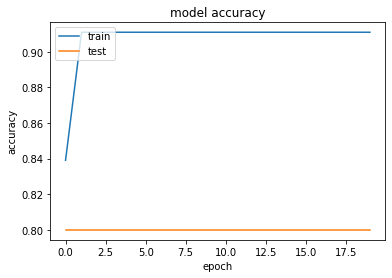

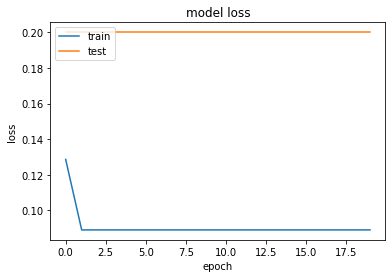

In [18]:

# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Creating a Validation set to re-check the model on brand new data

In [11]:
def generateAugumentedImagePairsValid(source_dir):
    print('Creating pairs from:', source_dir)

    listOfFiles = getListOfFiles(source_dir)
    print("Elements of list:", len(listOfFiles))
    listOfImages = []
    for filename in listOfFiles:
        image = normalizeImage((greyImage(readImageFromFile(filename))))
        #for x in range(0, 1):
        listOfImages.append([filename, image])

    print("Shuffling the images...")
    random.shuffle(listOfImages)
    

    listOfCombinedImages2 = []
    temp = None
    for (filename, image) in listOfImages:
        if temp is None:
            temp = (filename, image)
        else:
            c = (combineImg(temp[1], image), areSameFolder(temp[0], filename))
            listOfCombinedImages2.append(c)
            temp = None
    print("Returning list of CombinedImages of the new validation batch...")
    print("Number of items in list of CombinedImagesValidationBatch: ", len(listOfCombinedImages2))
    return listOfCombinedImages2


    

In [12]:
## NEW VALIDATION DATASET SCRAPED

Names2 = ["Kanye West face", "Matt Damon face", "Kendall Jenner face", "Katy Perry face"]



In [13]:
for element in Names2:
  downloader.download(element, limit=20, output_dir="valset/")


[%] Downloading Images to /content/valset/Kanye West face


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://etcanada.com/wp-content/uploads/2016/06/38318c8b98d80f87b8092378990b5691.jpg?quality=80&amp;strip=all
[%] File Downloaded !

[%] Downloading Image #2 from http://theawesomedaily.com/wp-content/uploads/2016/02/kanye-west-1950076.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://phandroid.com/wp-content/uploads/2016/04/kanye-west-portrait-768x890.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://akns-images.eonline.com/eol_images/Entire_Site/2014815/rs_634x1024-140915085903-634-kanye-west-hair.ls.91514.jpg?fit=around|634:auto&amp;output-quality=90&amp;crop=634:auto;center,top
[%] File Downloaded !

[%] Downloading Image #5 from https://media.vanityfair.com/photos/5ae8cb4ec639a3587939aa38/5:3/w_2000,h_1200,c_limit/tout-kanye-portrait.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i0.wp.com

Initiating the new ValSet as well as printing the pairs acquired from the set itself.

Creating pairs from: /content/valset
Elements of list: 80
/content/valset/Matt Damon face/Image_9.jpg
[[[ 96  64  29]
  [ 97  65  30]
  [ 96  64  29]
  ...
  [188 150  86]
  [187 149  85]
  [186 148  84]]

 [[ 97  65  30]
  [ 97  65  30]
  [ 97  65  30]
  ...
  [190 152  88]
  [189 151  87]
  [188 150  86]]

 [[ 97  65  30]
  [ 97  65  30]
  [ 97  65  30]
  ...
  [190 154  90]
  [189 153  89]
  [189 153  89]]

 ...

 [[255 206  66]
  [255 206  66]
  [255 205  68]
  ...
  [220 166  49]
  [220 167  47]
  [219 166  45]]

 [[255 207  67]
  [255 207  67]
  [255 205  68]
  ...
  [222 167  52]
  [219 166  46]
  [217 164  43]]

 [[254 205  65]
  [251 205  64]
  [253 204  64]
  ...
  [222 164  51]
  [220 163  47]
  [218 162  43]]]
/content/valset/Matt Damon face/Image_15.jpg
[[[227 220 217]
  [227 220 217]
  [227 220 217]
  ...
  [226 221 220]
  [225 220 219]
  [223 218 215]]

 [[224 217 214]
  [223 216 213]
  [225 218 215]
  ...
  [228 220 220]
  [228 220 220]
  [226 219 216]]

 [[227 220 217]

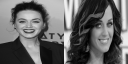

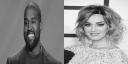

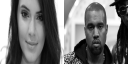

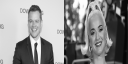

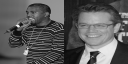

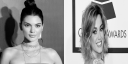

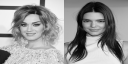

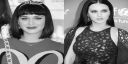

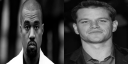

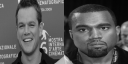

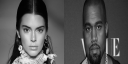

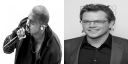

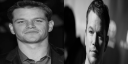

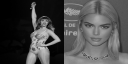

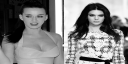

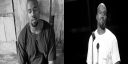

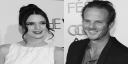

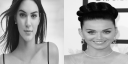

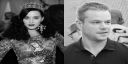

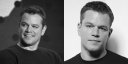

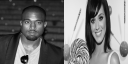

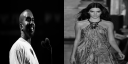

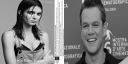

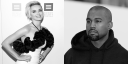

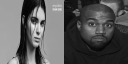

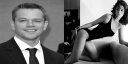

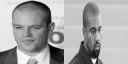

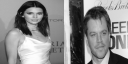

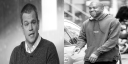

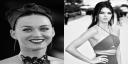

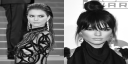

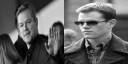

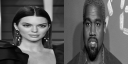

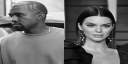

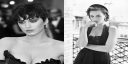

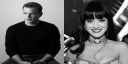

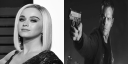

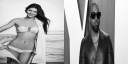

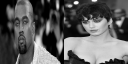

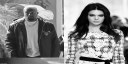

Returning list of CombinedImages of the new validation batch...
Number of items in list of CombinedImagesValidationBatch:  40
New Validation Set number of elements: 40


In [14]:
source2 = '/content/valset'

listOfCombinedImages2 = generateAugumentedImagePairsValid(source2)

list_of_pairs_with_vals_val = listOfCombinedImages2

print("New Validation Set number of elements:", len(list_of_pairs_with_vals_val))

Checking the Model accuracy on the new Validation Set.

In [20]:
x3 = []
for item in list_of_pairs_with_vals_val:
  image = item[0]
  x3.append(image)
x3 = np.stack(x3, 0)
x3 = x3.reshape(x3.shape[0], x3.shape[1], x3.shape[2], 1)
print(x3.shape)

# get the target training data (is matched or not)
y3 = []
for item in list_of_pairs_with_vals_val:
  result = item[1]
  y3.append(result)
y3 = np.array(y3)


print("Evaluate on test data")
results = model.evaluate(x3, y3, batch_size=128)
print("test loss, test acc:", results)

#Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x3[:3])
print("predictions shape:", predictions.shape)

(40, 64, 128, 1)
Evaluate on test data
1/1 [==============================] - 0s 149ms/step - loss: 0.2000 - accuracy: 0.8000
test loss, test acc: [0.20000000298023224, 0.800000011920929]
Generate predictions for 3 samples
predictions shape: (3, 1)
